In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#librerias
import os
import random
import joblib
import numpy as np
import cv2 as cv
import pandas as pd
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **1. Etapa procidemental de exploración basica**

*Aqui se prueba una metodologia sencilla para una imagen, buscando un funcionamiento adecuado para la regresión lineal y posteriormente realizar mejores operaciones morfologicas y aplicacion de herramientas de clase.*

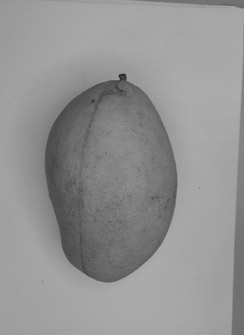

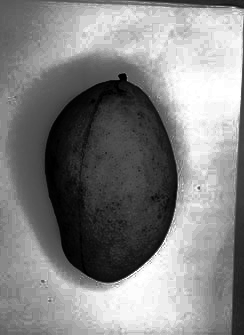

True

In [ ]:
#Hago la ecualizacion de una imagen para analizar la viabilidad de continuar la binarización por ese metodo.
img = cv.imread('/content/drive/MyDrive/Computervision/S7/images/108b.jpg', cv.IMREAD_GRAYSCALE)
img_equalized = cv.equalizeHist(img)
cv2_imshow(img)
cv2_imshow(img_equalized)
cv.imwrite('/content/drive/MyDrive/Computervision/S7/imagen_ecualizada.jpg', img_equalized) #guardo

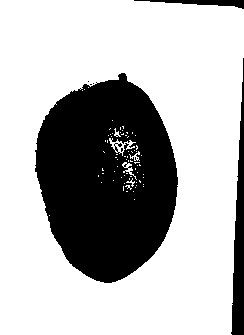

True

In [ ]:
# Subo imagen ecualizada
imagen_ecualizada = cv.imread('/content/drive/MyDrive/Computervision/S7/imagen_ecualizada.jpg')

# Convierto ecualizada a escala de grises
gray = cv.cvtColor(imagen_ecualizada, cv.COLOR_BGR2GRAY)

# Creación de la imagen en binaria
umbral, imagen_binaria = cv.threshold(gray, 75, 255, cv.THRESH_BINARY) #entre 65 y 255
cv2_imshow(imagen_binaria)
cv.imwrite('/content/drive/MyDrive/Computervision/S7/imagen_binaria.jpg', imagen_binaria) #guardo

In [ ]:
#Calculo de los Hu Moments de la imagen binarizada

image = cv.imread('/content/drive/MyDrive/Computervision/S7/imagen_binaria.jpg')
# Convert the image to grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Calculate the moments of the image
M = cv.moments(gray)
# Calculate the centroid coordinates
centroid_x = int(M["m10"] / M["m00"])
centroid_y = int(M["m01"] / M["m00"])

# Calculate Hu Moments
hu = cv.HuMoments(M)
print(hu)

[[ 1.19930171e-03]
 [ 1.52088077e-07]
 [ 8.78773141e-12]
 [ 1.14436286e-11]
 [ 3.91076161e-23]
 [ 1.54183061e-15]
 [-1.07889093e-22]]


In [ ]:
# En una lista guardo los Hu moments
hu_moments = []

# Iterar sobre los Hu moments, se añaden a la lista y se muestran
for valor in hu:
    hu_moments.append(valor[0])
print("Hu Moments(7):", hu_moments)

Hu Moments(7): [0.001199301710942627, 1.52088076527246e-07, 8.787731407081038e-12, 1.1443628555260002e-11, 3.9107616115608354e-23, 1.5418306140775192e-15, -1.0788909276451247e-22]


In [ ]:
# Calcular el promedio de los Hu moments, considerando los signos de Hu
hu_mean = sum(hu_moments) / len(hu_moments)
print("Hu mean(1):", hu_mean)

Hu mean(1): 0.00017135054560743658


# **Procedimiento para todo el dataset**

*Aqui se desarrolla la binarización y umbralización para todos los archivos de imagen.*

In [ ]:
# archivo CSV con (imagen, peso_fruto)
data = pd.read_csv('/content/drive/MyDrive/Computervision/S7/Harumanis_mango_weight.csv')

# Extraer nombres('no') y pesos_fruto('weight')
name = data['no'].tolist()
weight = data['weight'].tolist()

# Arreglo una lista que relacione los nombres y pesos del csv
data_list = list(zip(name, weight))
print("Data:")
for i in data_list:
    print(i)

Data:
('1a.jpg', 0.5)
('2a.jpg', 0.5)
('3a.jpg', 0.35)
('4a.jpg', 0.45)
('5a.jpg', 0.5)
('6a.jpg', 0.4)
('7a.jpg', 0.7)
('8a.jpg', 0.45)
('9a.jpg', 0.3)
('10a.jpg', 0.3)
('11a.jpg', 0.4)
('12a.jpg', 0.35)
('13a.jpg', 0.3)
('14a.jpg', 0.5)
('15a.jpg', 0.5)
('16a.jpg', 0.3)
('17a.jpg', 0.35)
('18a.jpg', 0.35)
('19a.jpg', 0.5)
('20a.jpg', 0.4)
('21a.jpg', 0.4)
('22a.jpg', 0.3)
('23a.jpg', 0.35)
('24a.jpg', 0.4)
('25a.jpg', 0.35)
('26a.jpg', 0.3)
('27a.jpg', 0.35)
('28a.jpg', 0.35)
('29a.jpg', 0.4)
('30a.jpg', 0.35)
('31a.jpg', 0.4)
('32a.jpg', 0.25)
('33a.jpg', 0.35)
('34a.jpg', 0.3)
('35a.jpg', 0.3)
('36a.jpg', 0.4)
('37a.jpg', 0.45)
('38a.jpg', 0.4)
('39a.jpg', 0.35)
('40a.jpg', 0.4)
('41a.jpg', 0.35)
('42a.jpg', 0.5)
('43a.jpg', 0.4)
('44a.jpg', 0.3)
('45a.jpg', 0.55)
('46a.jpg', 0.35)
('47a.jpg', 0.45)
('48a.jpg', 0.45)
('49a.jpg', 0.35)
('50a.jpg', 0.5)
('51a.jpg', 0.5)
('52a.jpg', 0.35)
('53a.jpg', 0.4)
('54a.jpg', 0.45)
('55a.jpg', 0.3)
('56a.jpg', 0.5)
('57a.jpg', 0.35)
('58a.jpg'

In [ ]:
# Imprimir solo la columna de los nombres
print("filename:")
for j in data_list:
    print(j[1])

filename:
0.5
0.5
0.35
0.45
0.5
0.4
0.7
0.45
0.3
0.3
0.4
0.35
0.3
0.5
0.5
0.3
0.35
0.35
0.5
0.4
0.4
0.3
0.35
0.4
0.35
0.3
0.35
0.35
0.4
0.35
0.4
0.25
0.35
0.3
0.3
0.4
0.45
0.4
0.35
0.4
0.35
0.5
0.4
0.3
0.55
0.35
0.45
0.45
0.35
0.5
0.5
0.35
0.4
0.45
0.3
0.5
0.35
0.45
0.45
0.4
0.5
0.5
0.45
0.5
0.45
0.5
0.45
0.45
0.4
0.4
0.5
0.45
0.45
0.55
0.6
0.3
0.4
0.3
0.3
0.5
0.51
0.52
0.65
0.41
0.53
0.6
0.45
0.45
0.58
0.44
0.38
0.52
0.58
0.57
0.49
0.53
0.55
0.61
0.67
0.54
0.64
0.51
0.53
0.54
0.52
0.58
0.59
0.68
0.43
0.45
0.54
0.39
0.65
0.57
0.59
0.6
0.62
0.42
0.4
0.52
0.41
0.54
0.66
0.5
0.41
0.41
0.38
0.45
0.49
0.44
0.39
0.41
0.39
0.58
0.6
0.4
0.43
0.43
0.54
0.41
0.46
0.45
0.45
0.41
0.48
0.53
0.53
0.33
0.5
0.48
0.45
0.39
0.52
0.58
0.48
0.53
0.47
0.49
0.51
0.48
0.41
0.41
0.41
0.51
0.37
0.48
0.55
0.54
0.56
0.4
0.61
0.41
0.44
0.37
0.51
0.41
0.41
0.42
0.4
0.57
0.45
0.43
0.55
0.5
0.55
0.45
0.5
0.45
0.55
0.6
0.55
0.65
0.6
0.55
0.55
0.6
0.5
0.55
0.5
0.6
0.6
0.55
0.55
0.45
0.5
0.55
0.6
0.6
0.65
0.6
0.5
0.55


In [ ]:
#repositorio de imagenes
dir_images = '/content/drive/MyDrive/Computervision/S7/images/'

# Aqui almaceno las imágenes del folder cargadas en una lista
images = []

for filename in os.listdir(dir_images):
  img = cv.imread(os.path.join(dir_images, filename), cv.IMREAD_GRAYSCALE)
  images.append(img)
# N° de imágenes cargadas
print(f'{len(images)} images are loaded.')

160 images are loaded.


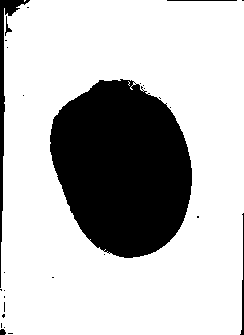

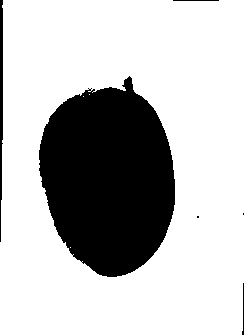

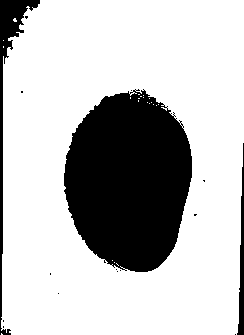

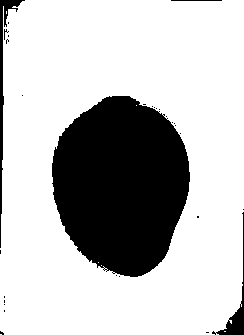

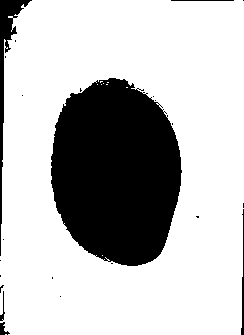

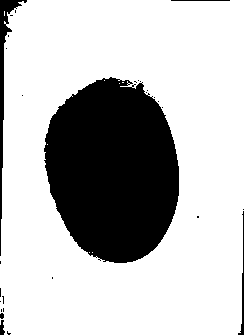

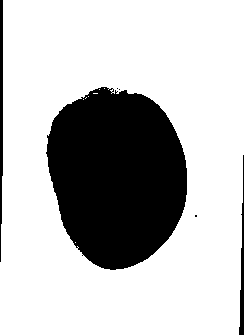

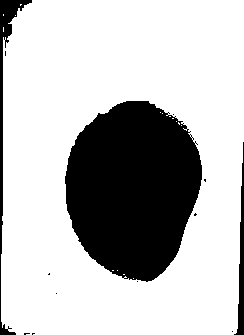

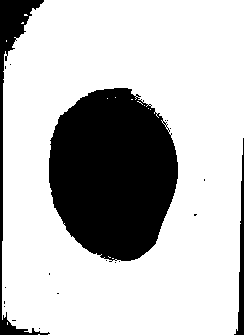

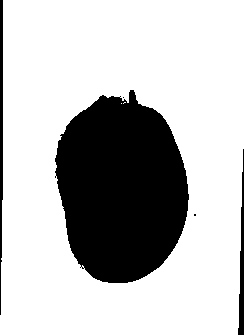

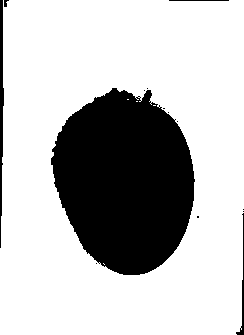

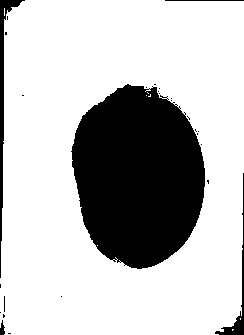

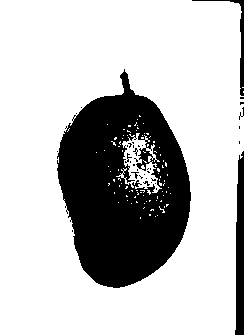

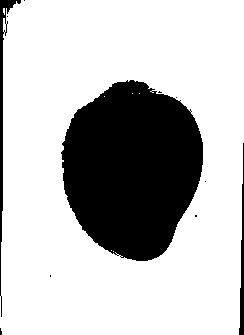

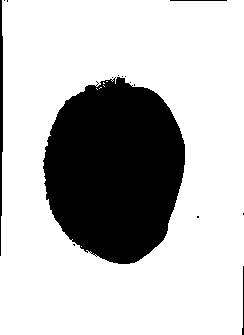

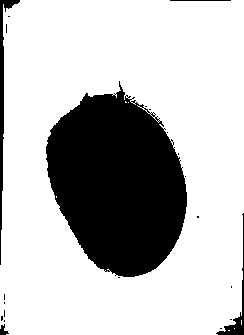

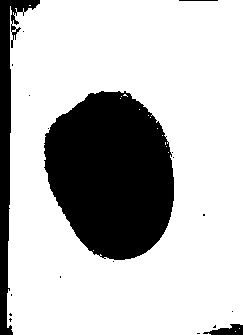

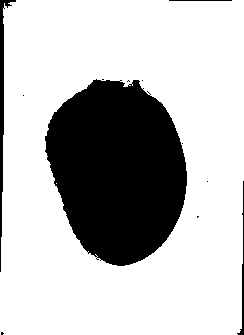

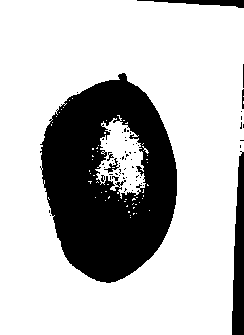

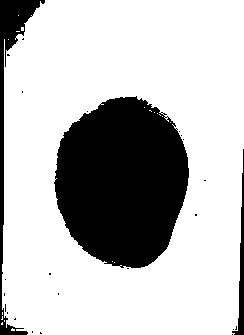

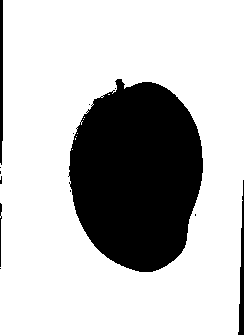

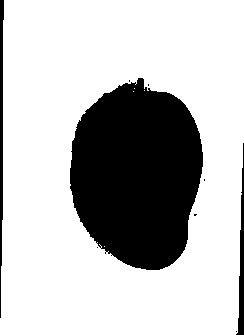

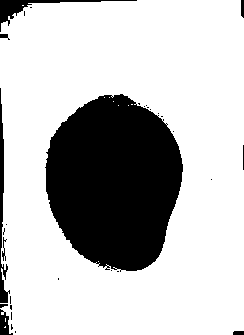

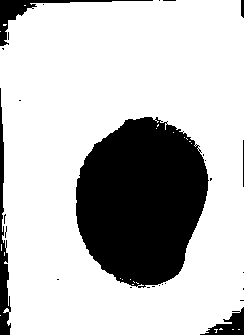

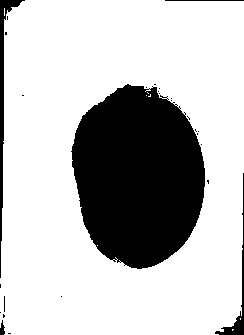

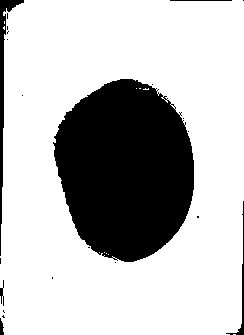

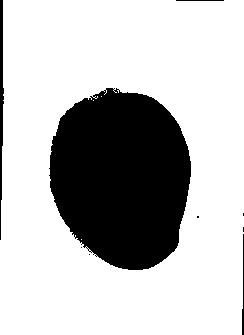

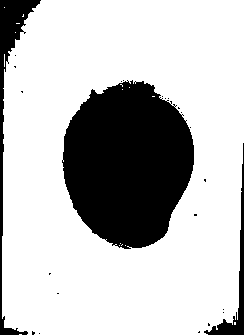

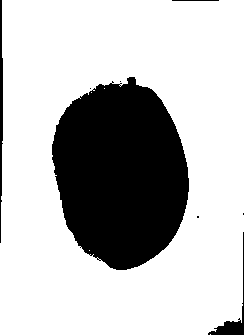

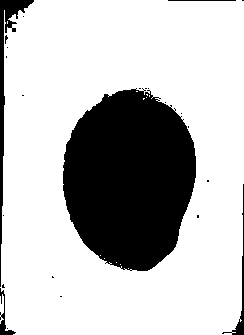

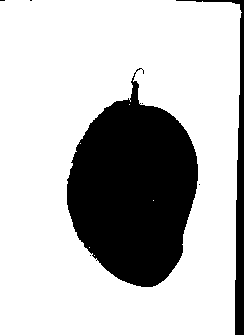

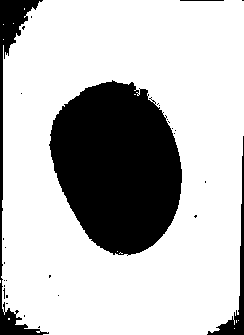

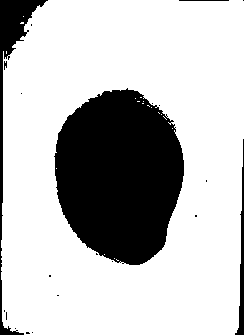

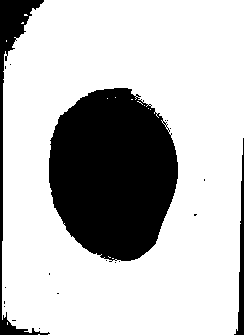

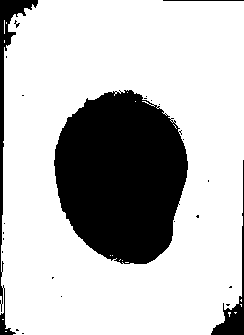

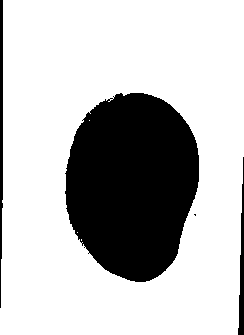

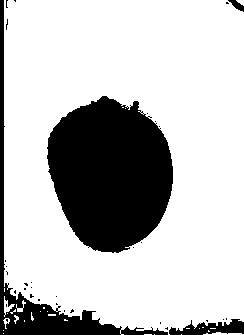

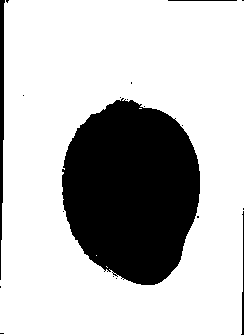

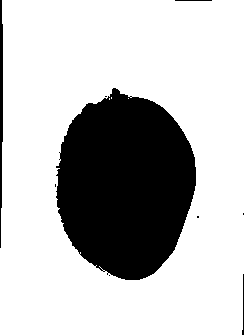

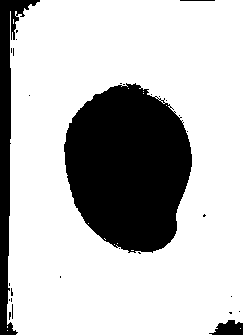

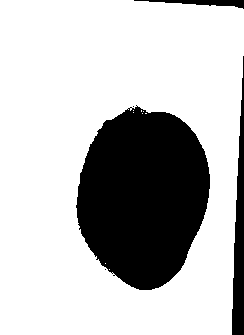

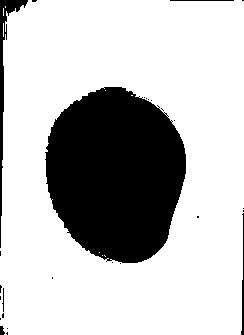

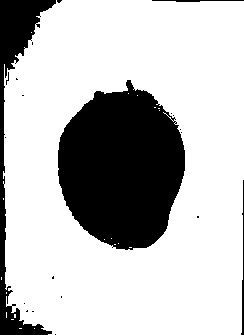

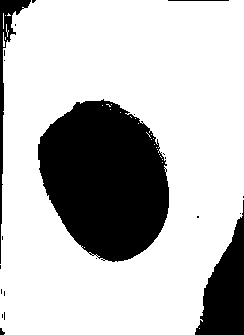

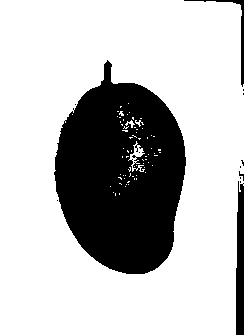

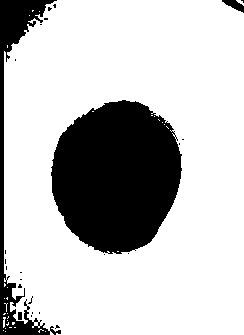

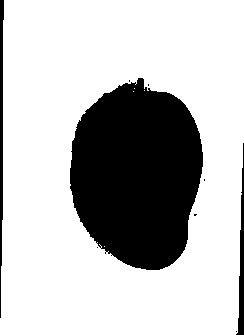

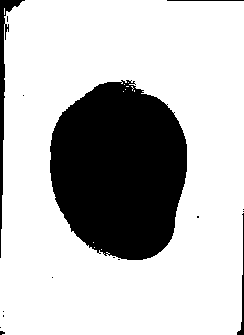

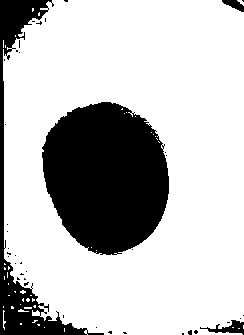

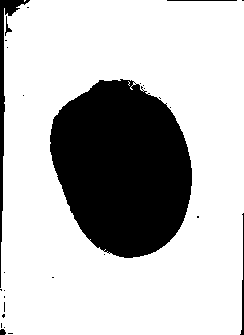

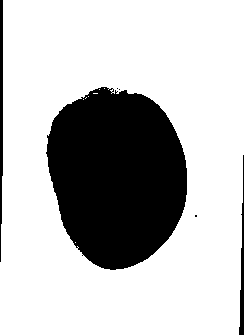

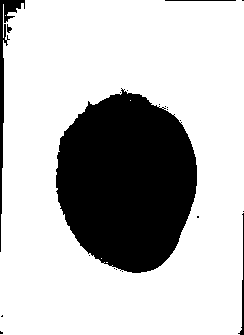

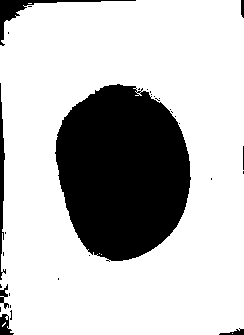

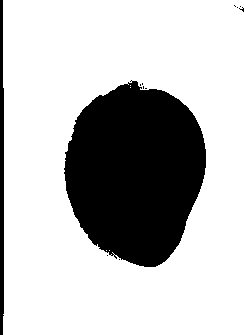

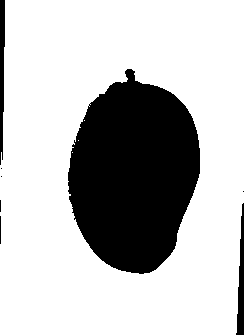

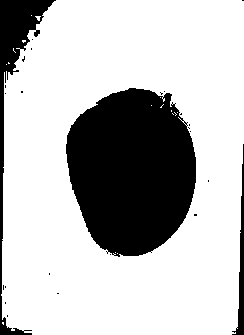

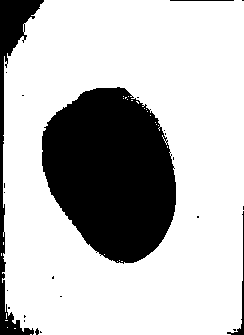

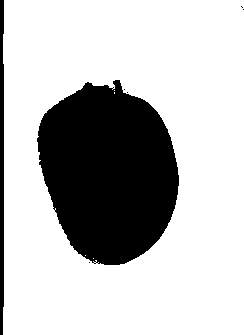

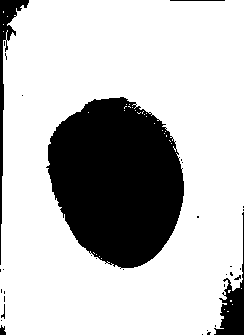

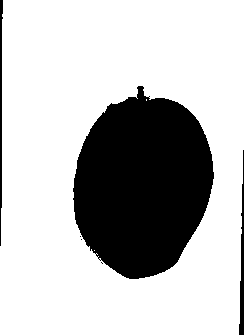

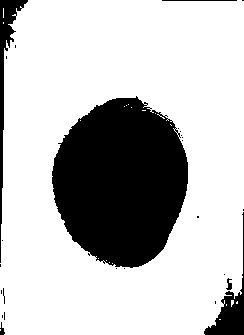

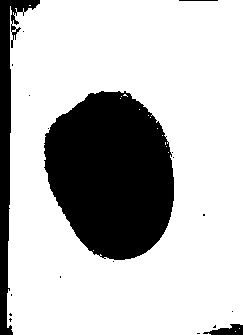

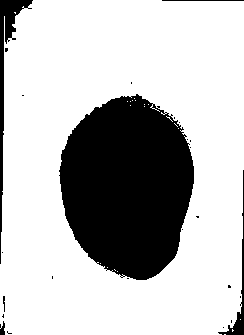

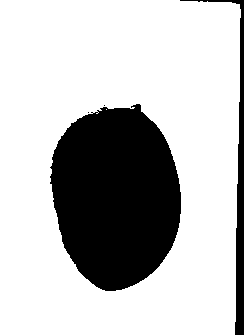

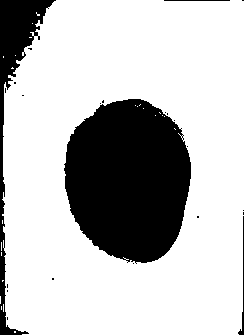

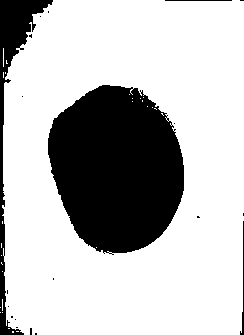

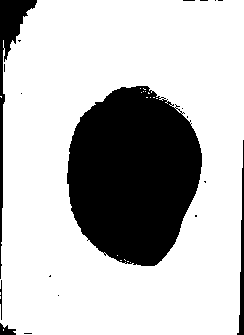

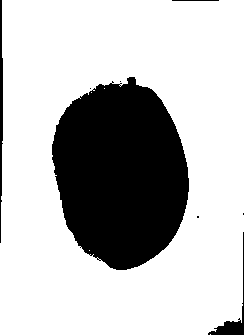

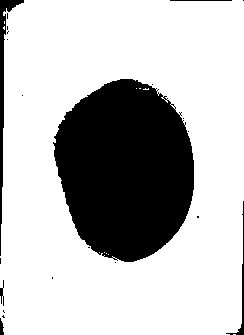

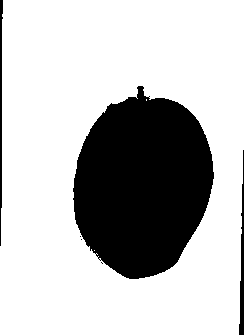

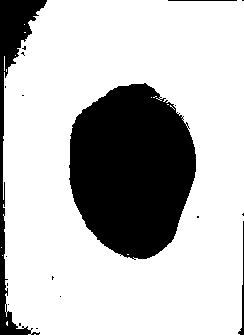

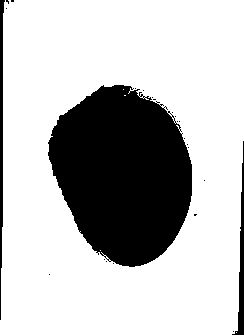

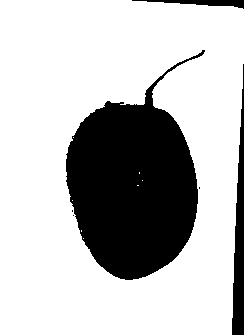

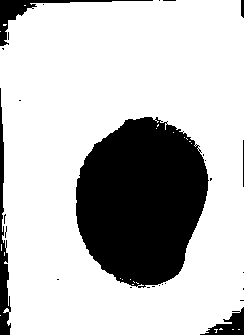

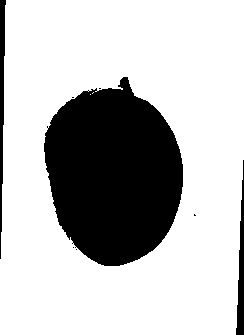

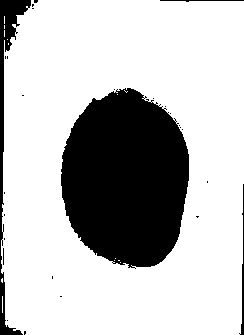

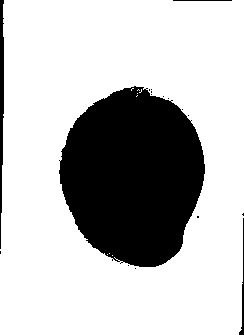

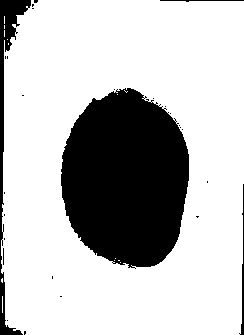

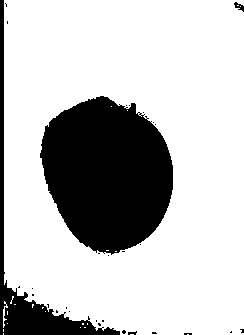

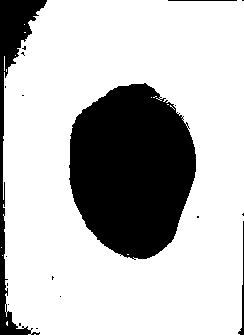

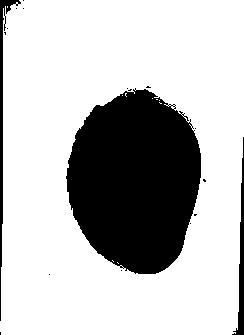

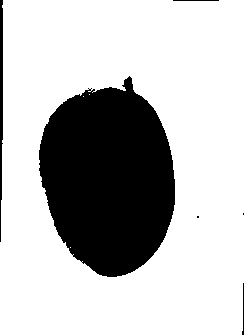

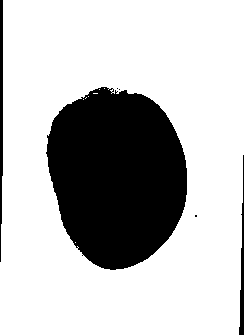

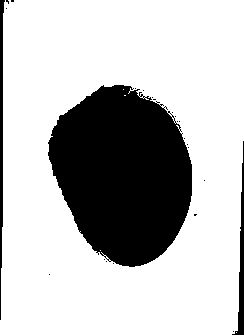

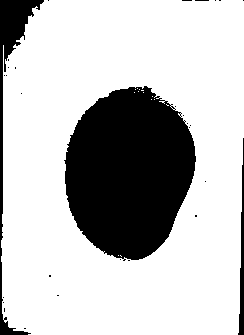

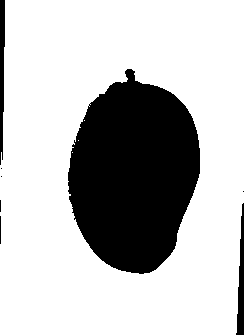

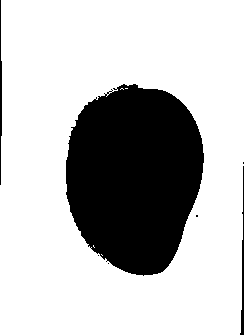

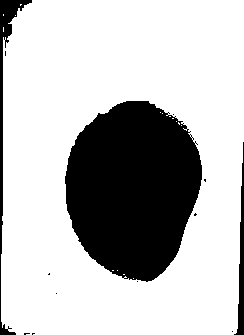

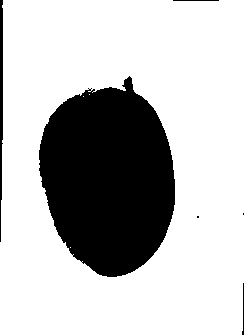

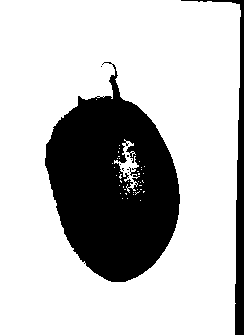

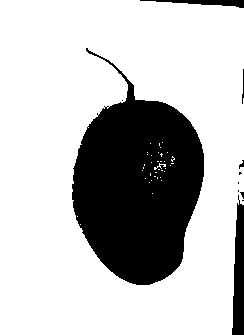

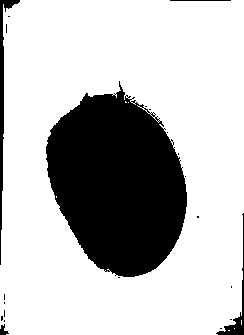

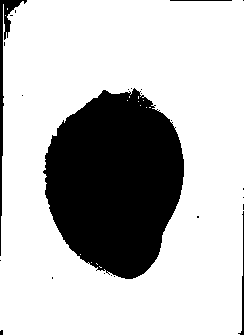

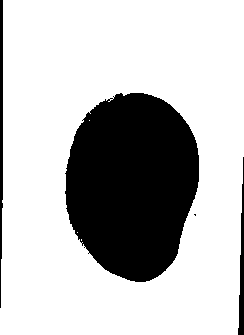

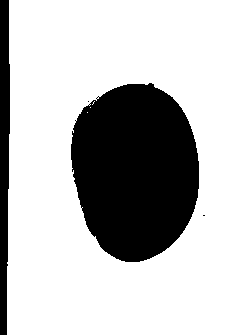

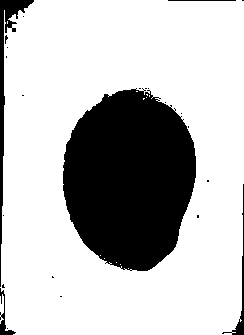

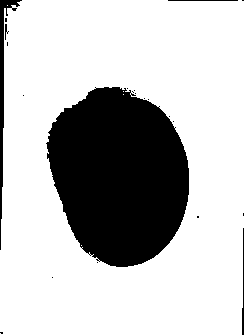

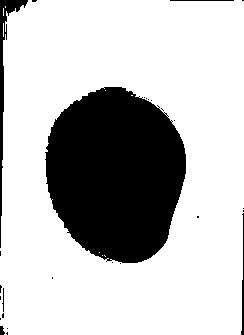

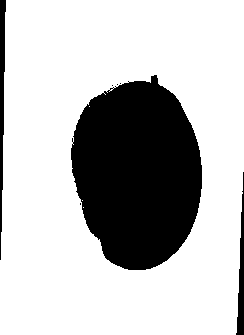

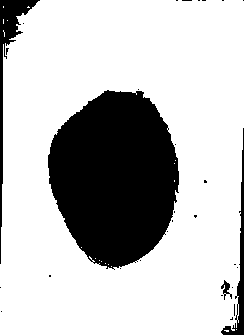

In [ ]:
# Función para aplicar ecualización de histograma y binarización a una imagen
def process_image(image_dir):
    # Leer la imagen
    img = cv.imread(image_dir, cv.IMREAD_GRAYSCALE)
    # Aplicar ecualización de histograma
    img_equalized = cv.equalizeHist(img)

    # Aplicar umbral para convertir la imagen en binaria
    umbral, binary_img = cv.threshold(img_equalized, 65, 255, cv.THRESH_BINARY)

    return binary_img

# Lista para almacenar las imágenes procesadas
images_processing = []

# Iterar sobre los archivos en el directorio
for filename in os.listdir(dir_images):
  # Verificar si el archivo es una imagen
  if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
    dir_image = os.path.join(dir_images, filename)
    # Procesar la imagen y agregarla a la lista de imágenes procesadas
    image_processing = process_image(dir_image)
    if image_processing is not None:
      images_processing.append(image_processing)

# Mostrar 6 imágenes binarias aleatorias
for _ in range(100):
  random_bi_img= random.choice(images_processing)
  cv2_imshow(random_bi_img)


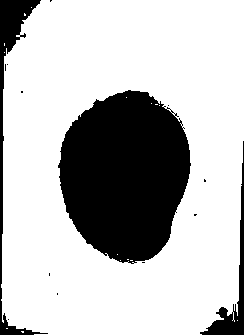

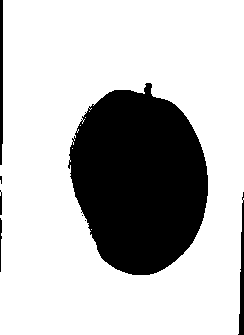

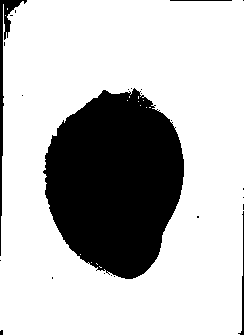

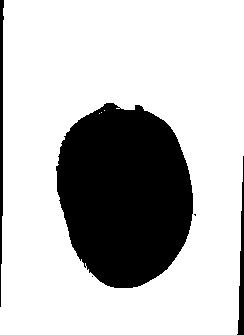

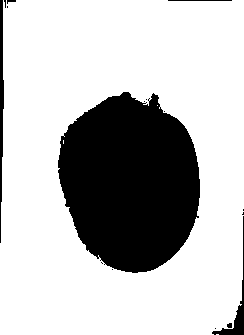

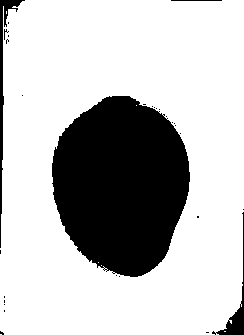

In [ ]:
# Directorio de salida para las imágenes procesadas
output_dir = '/content/drive/MyDrive/Computervision/S7/processed_images/'

# Lista para almacenar las imágenes procesadas
images_processing = []

# Iterar sobre los archivos en el directorio
for filename in os.listdir(dir_images):
  # Verificar si el archivo es una imagen
  if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
    dir_image = os.path.join(dir_images, filename)
    # Procesar la imagen
    image_processing = process_image(dir_image)
    if image_processing is not None:
      # Guardar la imagen procesada en el directorio de salida
      output_dir = os.path.join(output_dir, filename)
      cv.imwrite(output_dir, image_processing)
      # Agregar la imagen procesada a la lista
      images_processing.append(image_processing)

# Mostrar 6 imágenes binarias aleatorias
for _ in range(6):
    random_bi_img = random.choice(images_processing)
    cv2_imshow(random_bi_img)

In [ ]:
# Crear una lista para almacenar los momentos de Hu de cada imagen
list_hu_moments = []
for bi_img in images_processing:
    M = cv.moments(bi_img)
    hu = cv.HuMoments(M)
    hu_moments = []

    # Iterar sobre los valores de 'hu' y añadirlos a la lista
    for valor in hu:
        hu_moments.append(valor[0])  # Se añade el valor a la lista

    # Añadir la lista de momentos de Hu de esta imagen a la lista general
    list_hu_moments.append(hu_moments)

# Imprimir los momentos de Hu de todas las imágenes
for i, hu_moments in enumerate(list_hu_moments, start=1):
    print(f"Imagen {i}: Momentos de Hu:", hu_moments)

Imagen 1: Momentos de Hu: [0.000999549814950615, 9.033377460691193e-08, 3.5431262434374042e-12, 3.297794601280005e-12, -7.425553083022353e-24, 2.8618801824683073e-16, -8.481472526136662e-24]
Imagen 2: Momentos de Hu: [0.0010934562056436857, 1.2011006934173348e-07, 6.76522672345334e-12, 8.466509313726405e-12, 3.6870024121538254e-23, 1.6158382964688286e-15, -5.240591497619954e-23]
Imagen 3: Momentos de Hu: [0.0010685162352633206, 1.2325347715697186e-07, 3.636707196161808e-12, 1.000839175420158e-12, 4.627737142482716e-25, -2.2069789366971045e-16, 1.8524877534427295e-24]
Imagen 4: Momentos de Hu: [0.0010968487136789106, 1.1896655521459549e-07, 5.249933340317328e-12, 2.2094703260022622e-11, 2.3751279628028307e-22, 7.543733429557533e-15, -1.4628317485181056e-23]
Imagen 5: Momentos de Hu: [0.0011226720645936905, 1.310898600006648e-07, 3.5408698972669563e-13, 3.548919250515044e-13, 1.2281494265405104e-25, -1.853038907249224e-17, -2.726682395769943e-26]
Imagen 6: Momentos de Hu: [0.001122952344

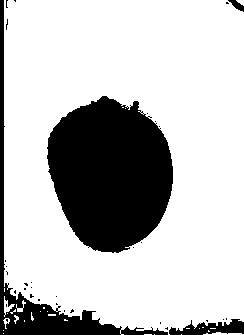

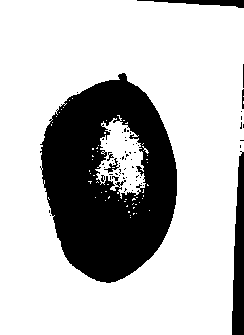

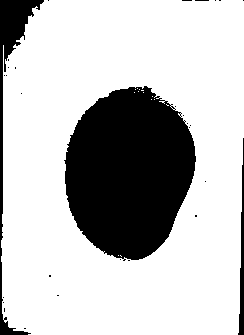

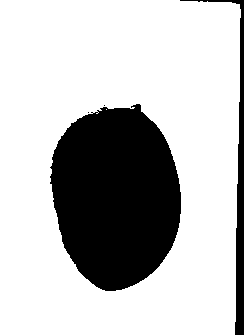

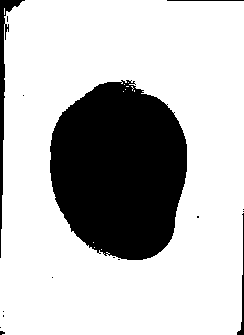

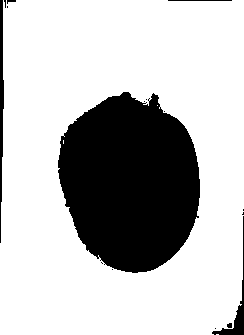

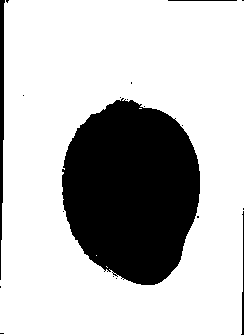

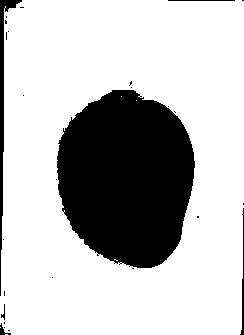

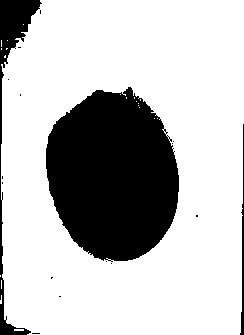

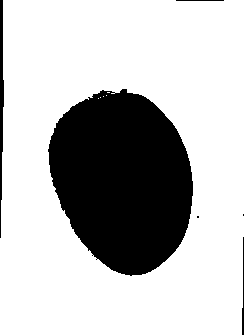

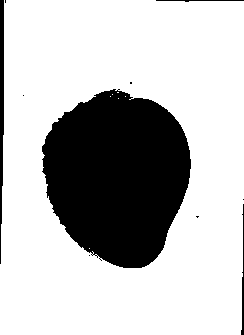

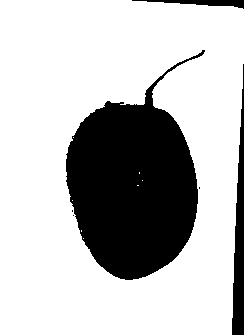

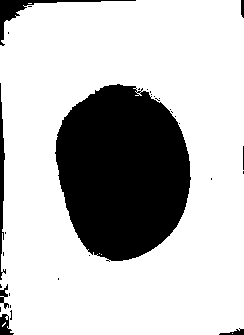

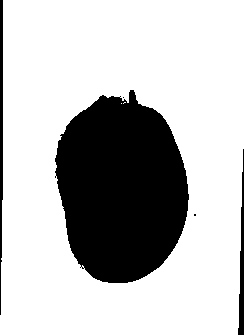

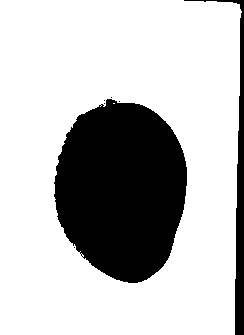

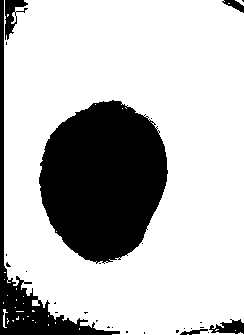

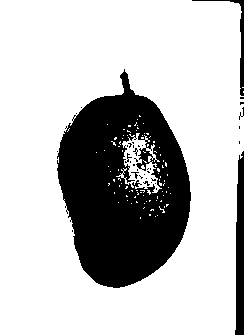

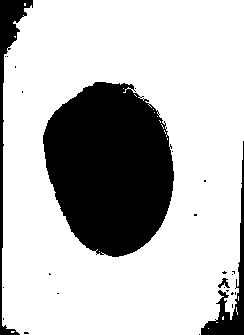

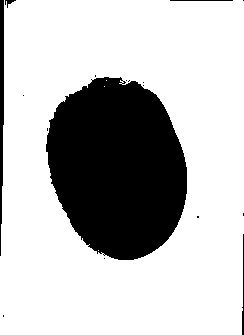

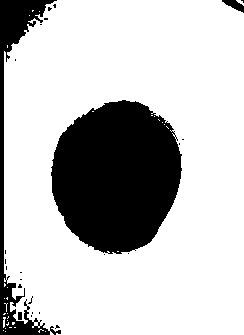

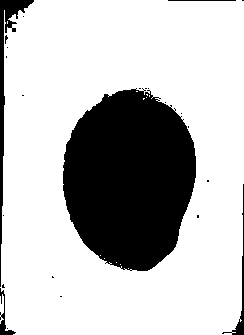

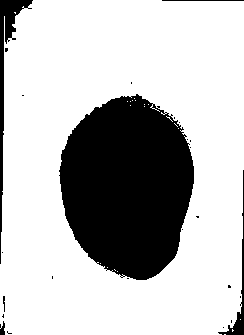

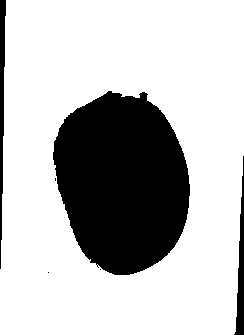

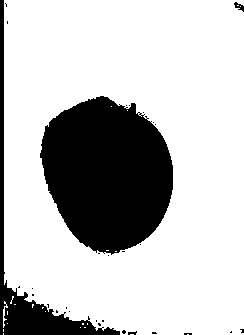

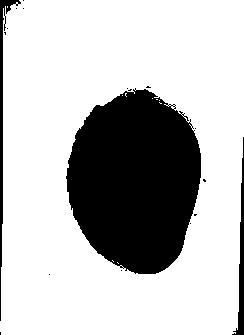

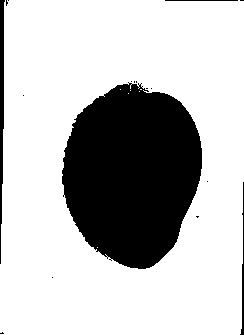

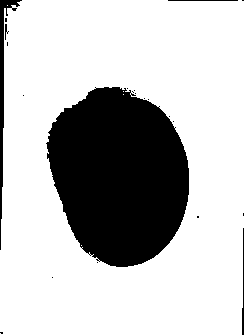

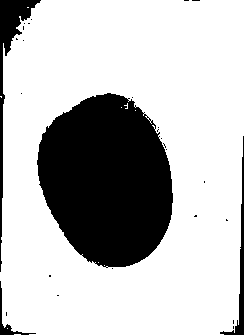

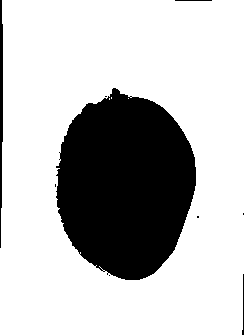

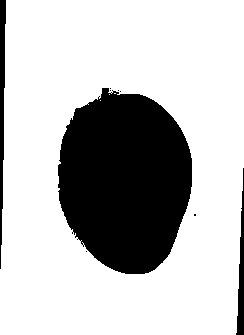

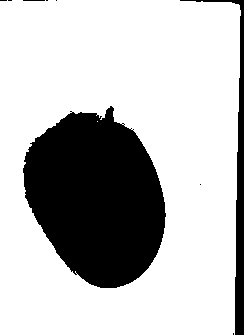

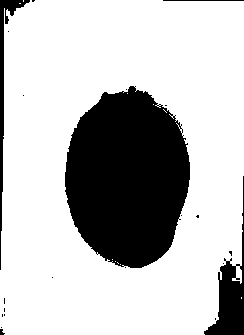

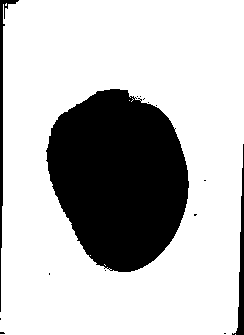

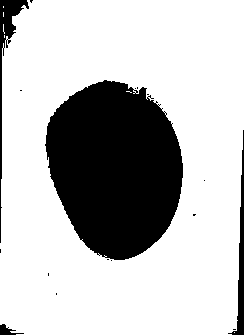

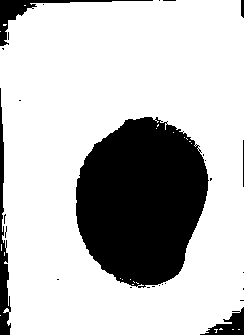

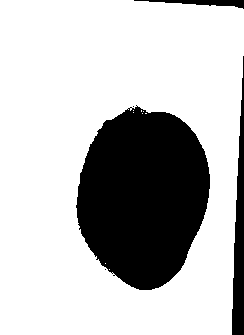

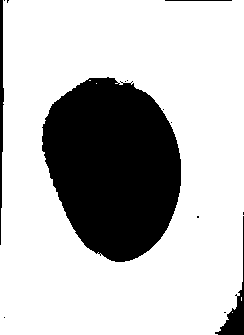

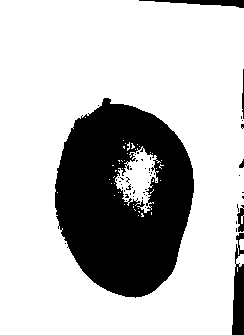

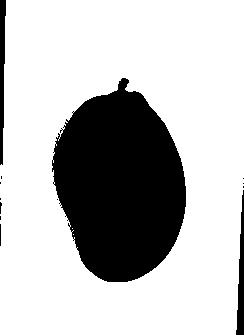

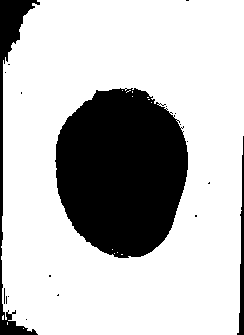

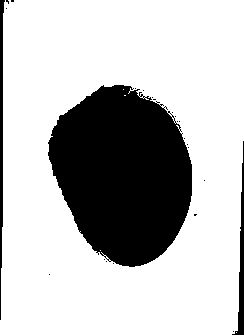

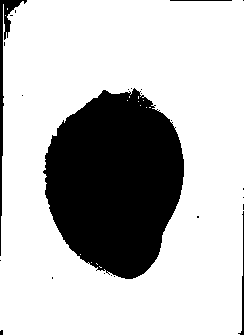

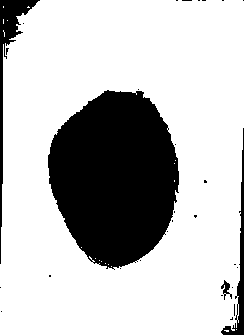

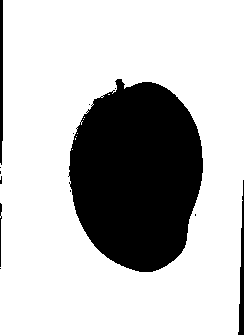

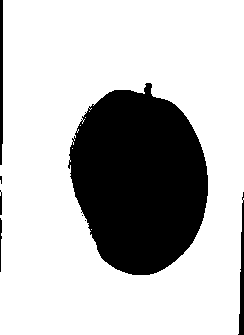

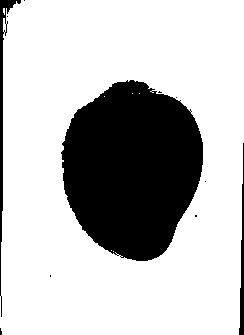

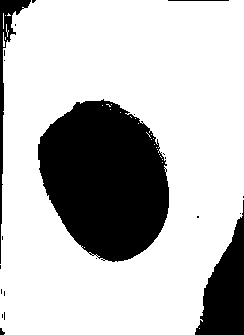

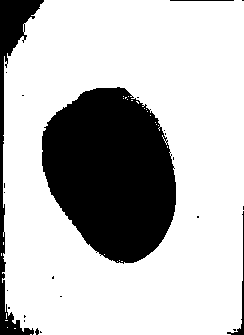

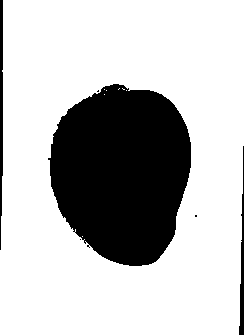

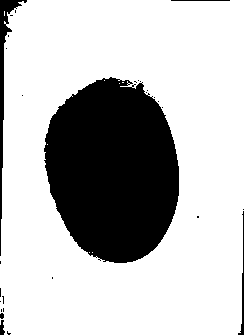

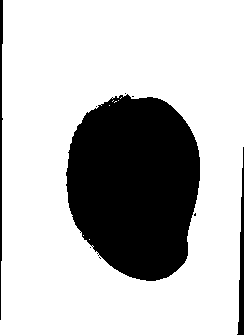

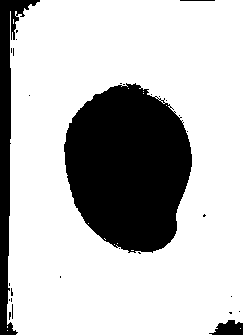

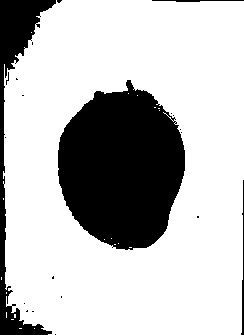

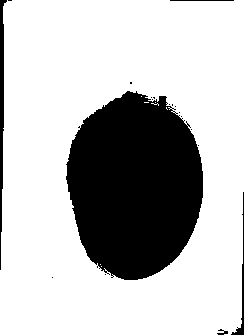

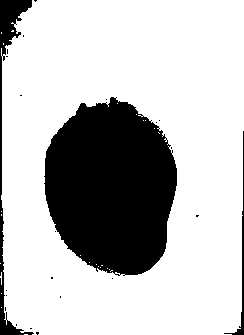

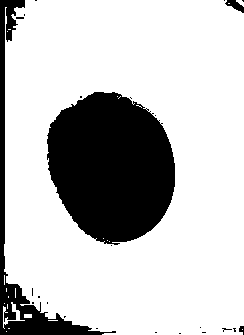

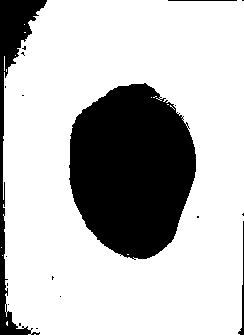

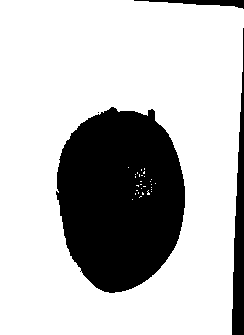

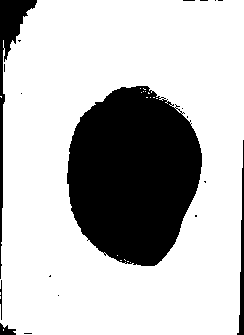

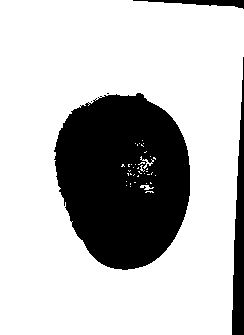

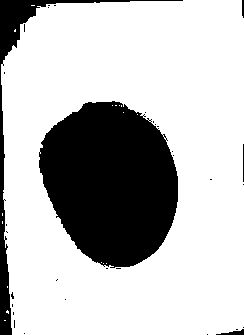

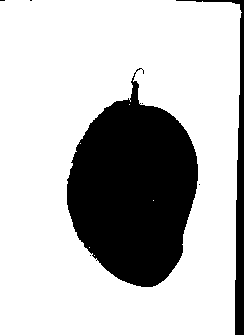

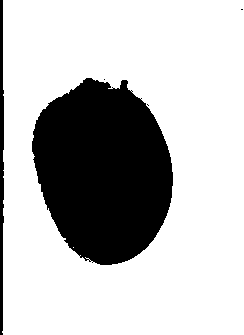

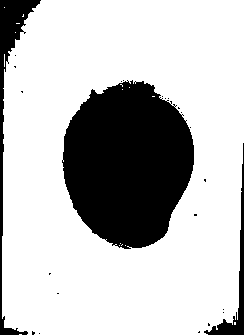

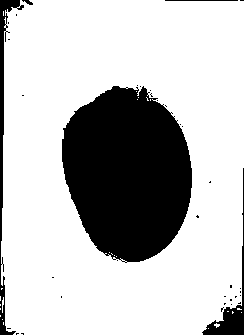

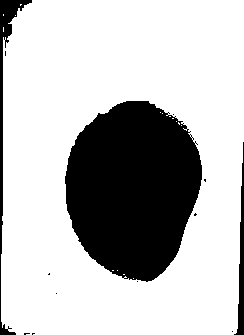

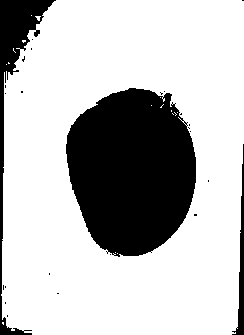

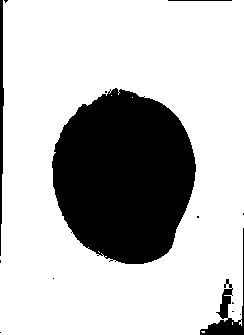

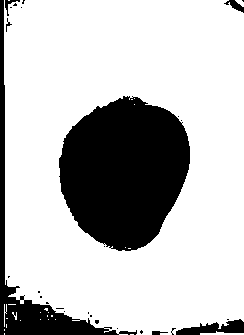

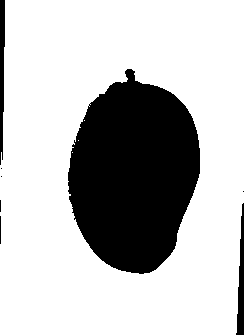

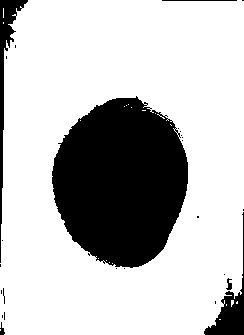

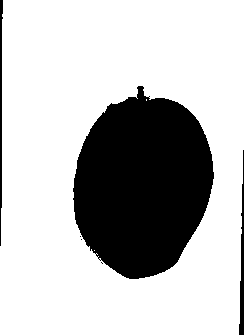

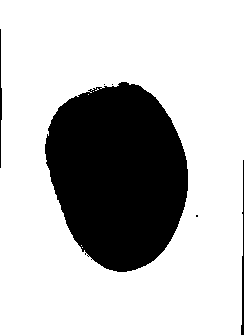

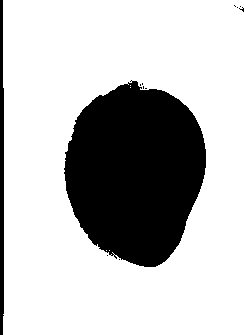

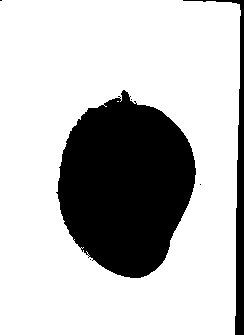

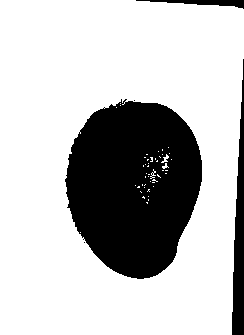

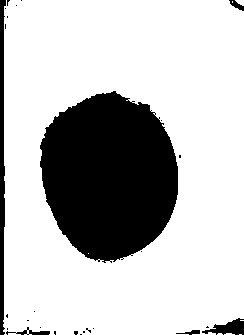

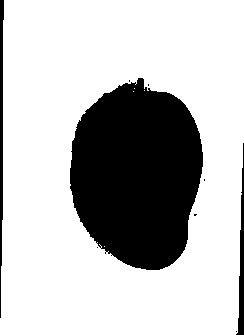

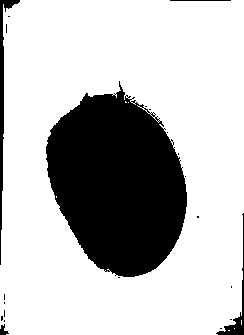

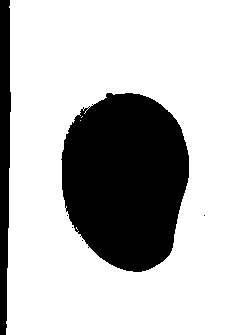

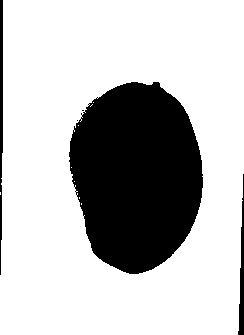

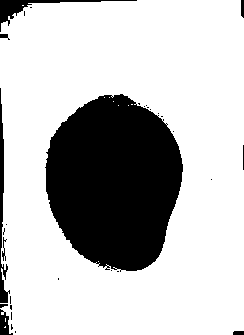

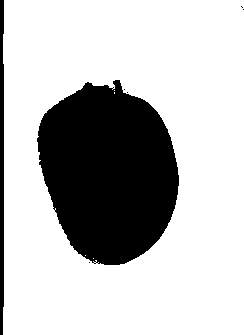

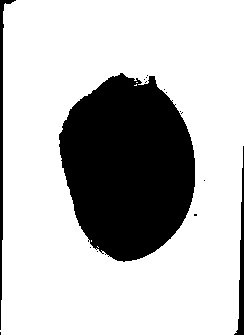

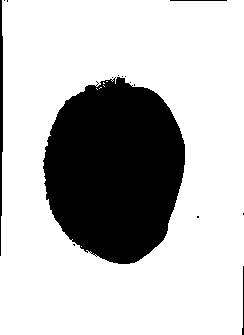

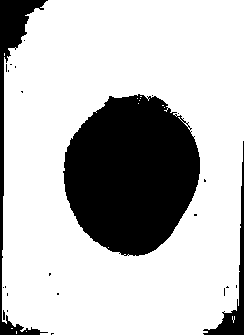

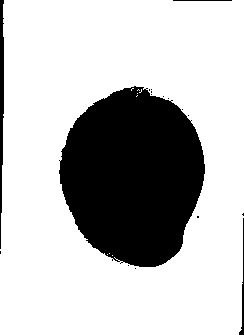

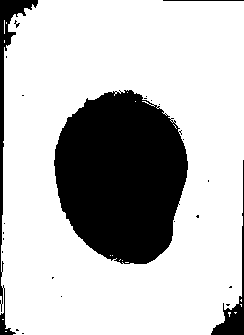

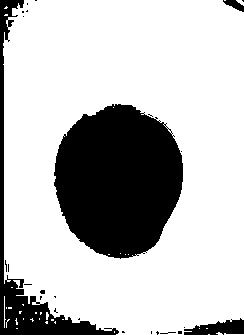

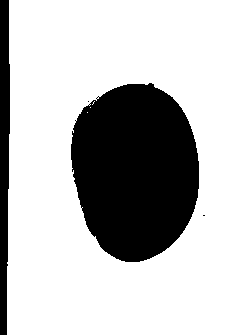

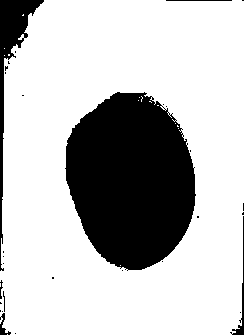

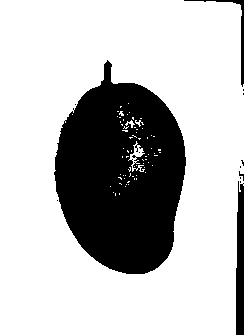

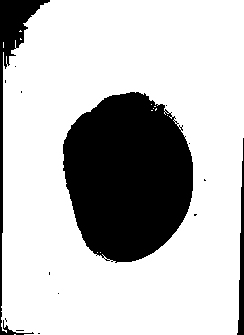

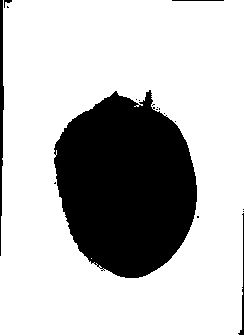

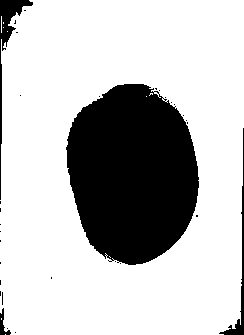

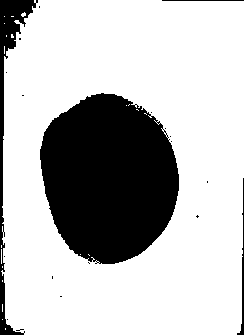

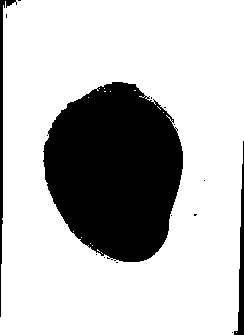

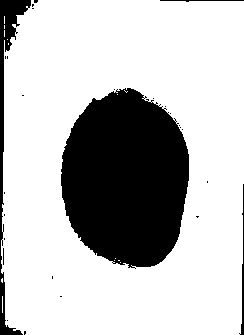

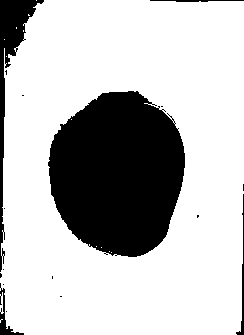

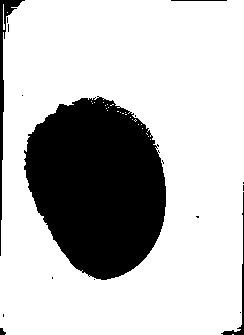

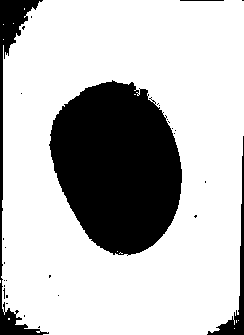

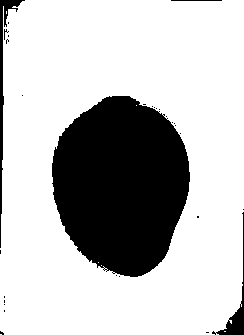

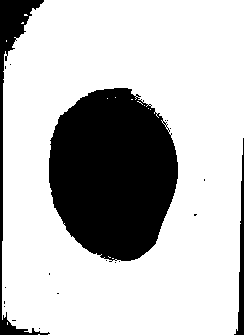

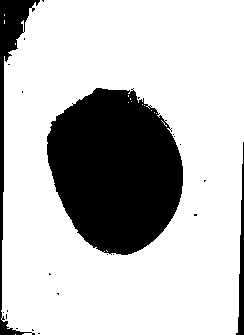

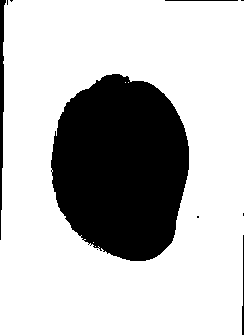

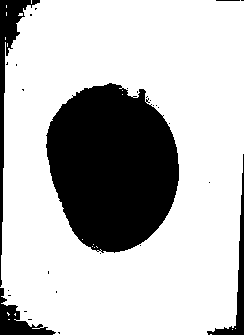

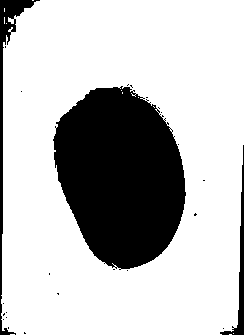

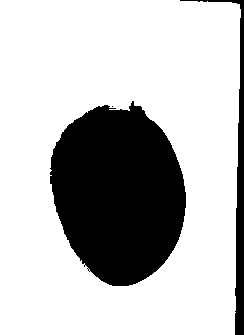

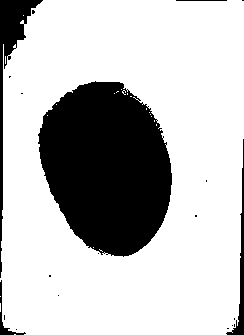

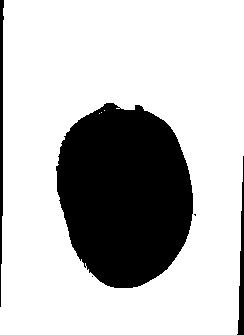

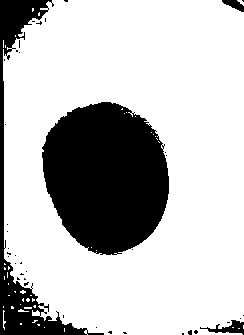

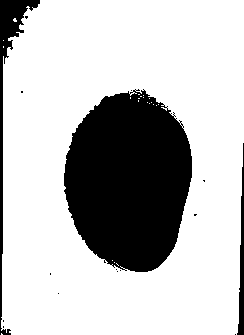

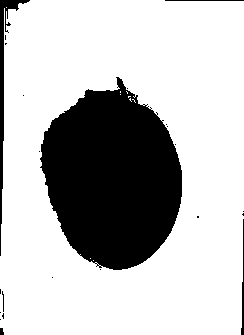

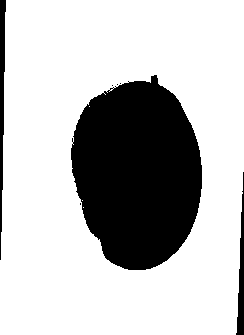

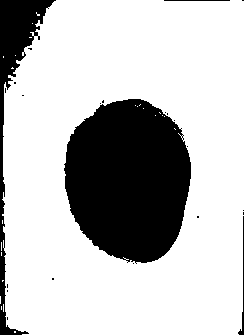

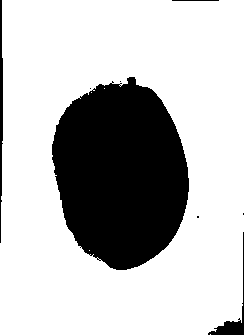

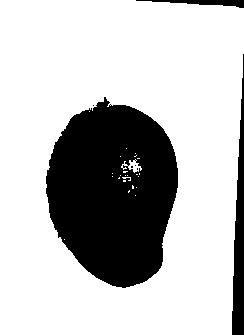

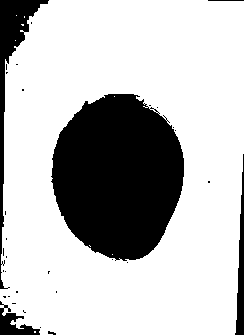

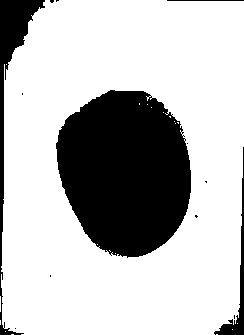

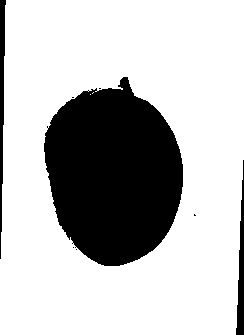

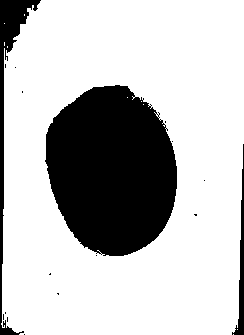

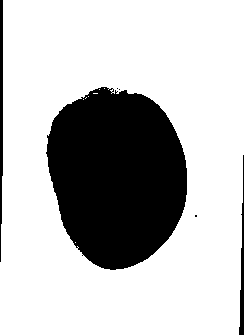

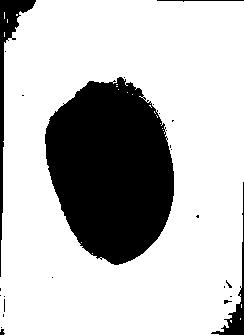

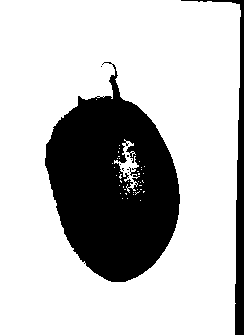

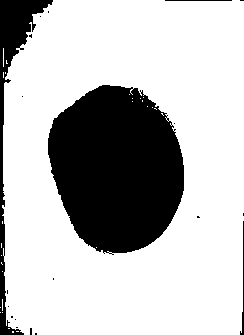

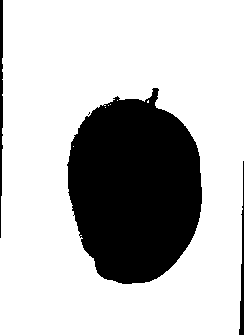

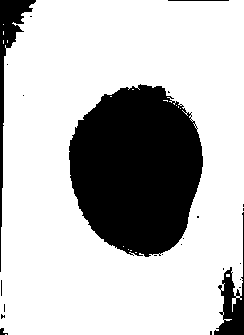

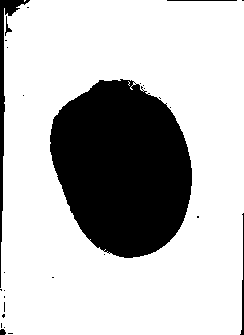

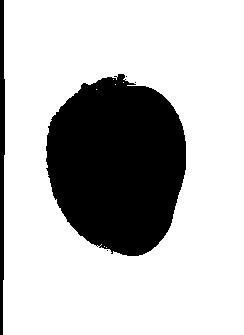

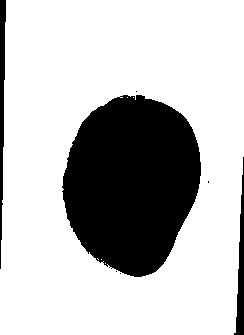

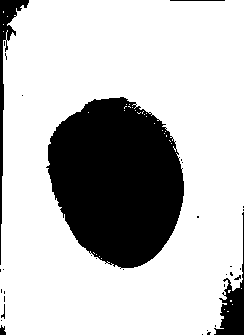

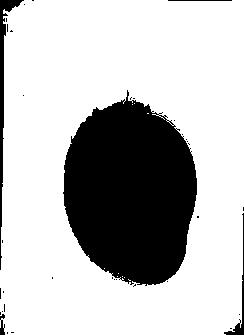

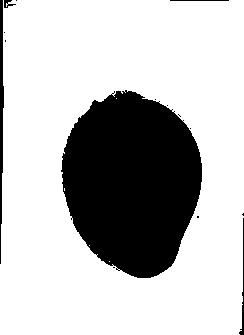

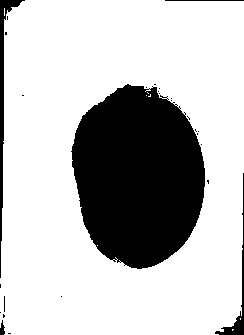

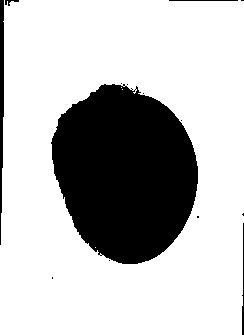

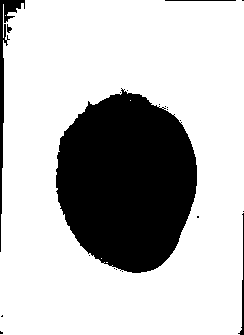

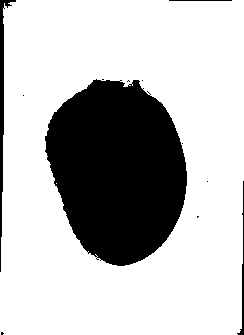

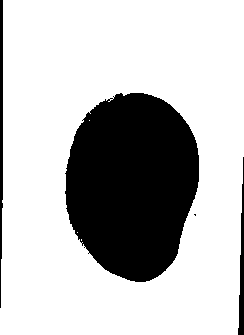

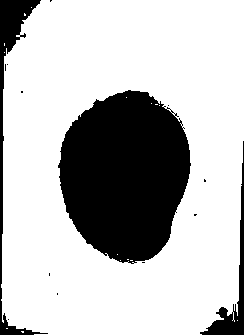

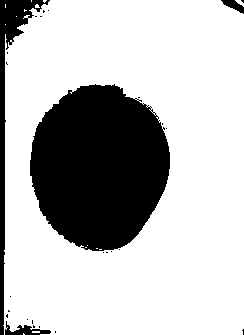

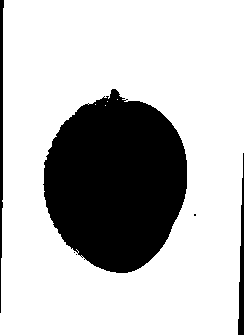

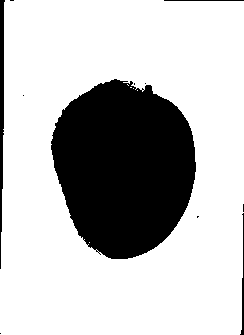

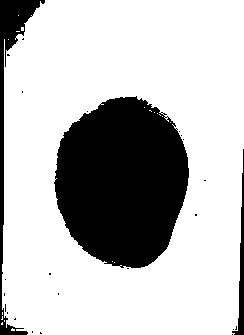

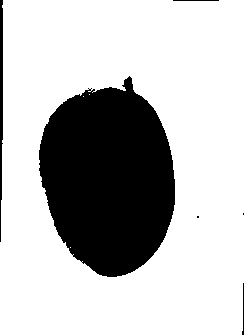

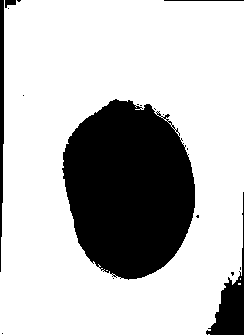

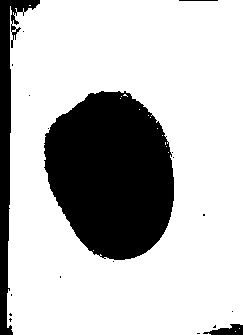

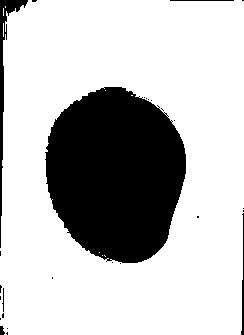

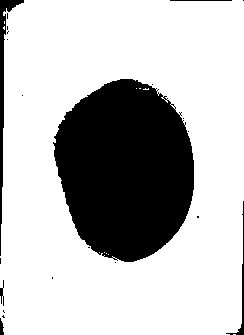

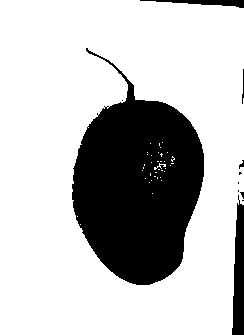

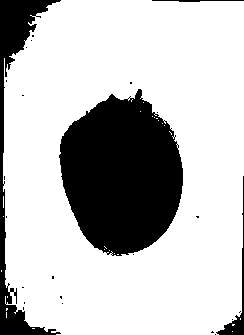

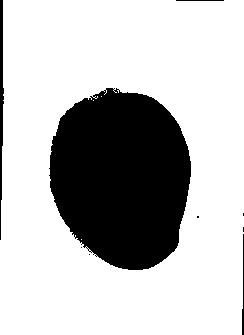

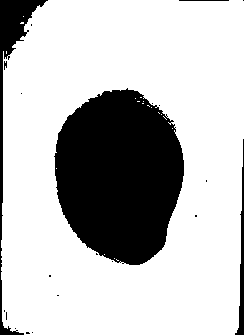

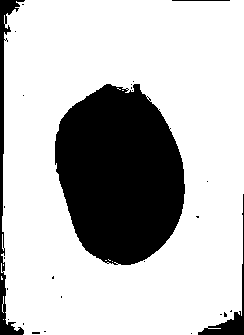

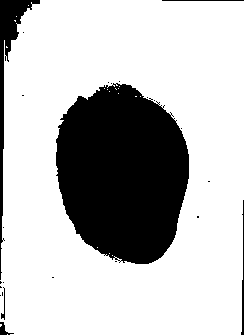

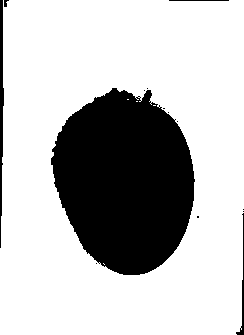

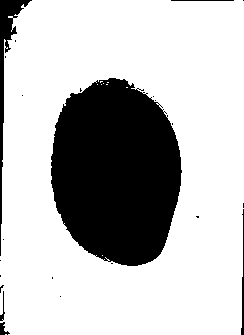

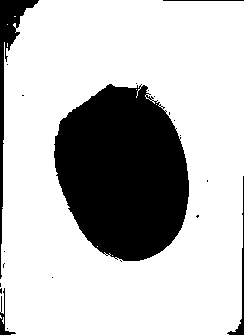

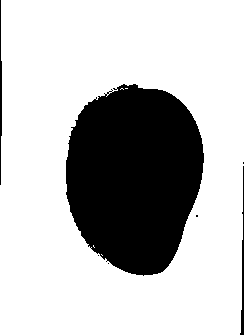

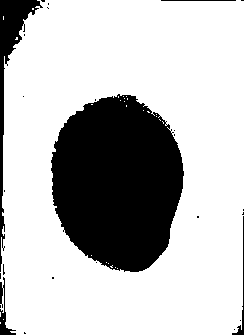

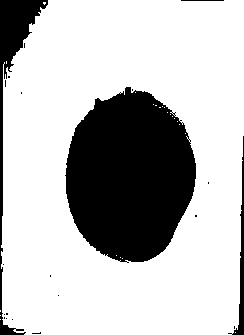

In [ ]:
# Diccionario para almacenar los momentos de Hu de cada imagen, con el nombre de la imagen como clave
hu_moments_dictionary = {}

# Iterar sobre los archivos en el directorio
for filename in os.listdir(dir_images):
    # Verificar si el archivo es una imagen
    if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
        dir_image = os.path.join(dir_images, filename)
        # Procesar la imagen
        image_processing = process_image(dir_image)
        M = cv.moments(image_processing)

        # Calcular los momentos de Hu
        hu = cv.HuMoments(M)

        # Almacenar los momentos de Hu junto con el nombre de la imagen en el diccionario
        hu_moments_dictionary[filename] = hu

            # Mostrar la imagen binaria
        cv2_imshow(image_processing)


In [ ]:
# Imprimir los momentos de Hu junto con el nombre de la imagen correspondiente
for image_name, hu_moments in hu_moments_dictionary.items():
    print(f"Imagen '{image_name}': Momentos de Hu:", hu_moments)

Imagen '10b.jpg': Momentos de Hu: [[ 9.99549815e-04]
 [ 9.03337746e-08]
 [ 3.54312624e-12]
 [ 3.29779460e-12]
 [-7.42555308e-24]
 [ 2.86188018e-16]
 [-8.48147253e-24]]
Imagen '108b.jpg': Momentos de Hu: [[ 1.09345621e-03]
 [ 1.20110069e-07]
 [ 6.76522672e-12]
 [ 8.46650931e-12]
 [ 3.68700241e-23]
 [ 1.61583830e-15]
 [-5.24059150e-23]]
Imagen '131b.jpg': Momentos de Hu: [[ 1.06851624e-03]
 [ 1.23253477e-07]
 [ 3.63670720e-12]
 [ 1.00083918e-12]
 [ 4.62773714e-25]
 [-2.20697894e-16]
 [ 1.85248775e-24]]
Imagen '100b.jpg': Momentos de Hu: [[ 1.09684871e-03]
 [ 1.18966555e-07]
 [ 5.24993334e-12]
 [ 2.20947033e-11]
 [ 2.37512796e-22]
 [ 7.54373343e-15]
 [-1.46283175e-23]]
Imagen '155a.jpg': Momentos de Hu: [[ 1.12267206e-03]
 [ 1.31089860e-07]
 [ 3.54086990e-13]
 [ 3.54891925e-13]
 [ 1.22814943e-25]
 [-1.85303891e-17]
 [-2.72668240e-26]]
Imagen '164b.jpg': Momentos de Hu: [[1.12295234e-03]
 [1.29343964e-07]
 [1.75707302e-12]
 [6.94566271e-12]
 [1.11373000e-23]
 [1.94671726e-15]
 [2.15571449e

In [ ]:
# Solicitar nombre de la imagen
image_called = input("Nombre de la imagen+jpg: ")

# Obtener la lista asociada de su diccionario
linked_list = hu_moments_dictionary.get(image_called, "La imagen no se encuentra en el diccionario")
print(linked_list)

Nombre de la imagen+jpg: 108b.jpg
[[ 1.09345621e-03]
 [ 1.20110069e-07]
 [ 6.76522672e-12]
 [ 8.46650931e-12]
 [ 3.68700241e-23]
 [ 1.61583830e-15]
 [-5.24059150e-23]]


In [ ]:
print(hu_moments_dictionary)

{'10b.jpg': array([[ 9.99549815e-04],
       [ 9.03337746e-08],
       [ 3.54312624e-12],
       [ 3.29779460e-12],
       [-7.42555308e-24],
       [ 2.86188018e-16],
       [-8.48147253e-24]]), '108b.jpg': array([[ 1.09345621e-03],
       [ 1.20110069e-07],
       [ 6.76522672e-12],
       [ 8.46650931e-12],
       [ 3.68700241e-23],
       [ 1.61583830e-15],
       [-5.24059150e-23]]), '131b.jpg': array([[ 1.06851624e-03],
       [ 1.23253477e-07],
       [ 3.63670720e-12],
       [ 1.00083918e-12],
       [ 4.62773714e-25],
       [-2.20697894e-16],
       [ 1.85248775e-24]]), '100b.jpg': array([[ 1.09684871e-03],
       [ 1.18966555e-07],
       [ 5.24993334e-12],
       [ 2.20947033e-11],
       [ 2.37512796e-22],
       [ 7.54373343e-15],
       [-1.46283175e-23]]), '155a.jpg': array([[ 1.12267206e-03],
       [ 1.31089860e-07],
       [ 3.54086990e-13],
       [ 3.54891925e-13],
       [ 1.22814943e-25],
       [-1.85303891e-17],
       [-2.72668240e-26]]), '164b.jpg': array([[

In [ ]:
# Diccionario para almacenar los momentos de Hu y el peso de cada imagen
hu_M_Weight_dic = {}

# Iterar sobre las imágenes en el diccionario de momentos de Hu
for image_name, hu_moments in hu_moments_dictionary.items():
  # Iterar sobre los elementos en la lista de datos
  for k in data_list:
    # Verificar si el nombre de la imagen coincide con el nombre de la imagen en los datos
    if k[0] == image_name:
      # Agregar el peso correspondiente al nombre de la imagen en el diccionario de momentos de Hu
      hu_M_Weight_dic[image_name] = {'HuMoments': hu_moments, 'Weight': k[1]}
      break  # Salir del bucle una vez que se haya encontrado la coincidencia

# Imprimir el diccionario de momentos de Hu y peso
for image_name, j in hu_M_Weight_dic.items():
  print(f"Imagen '{image_name}': Momentos de Hu:", j['HuMoments'], ", Weight:", j['Weight'])

Imagen '10b.jpg': Momentos de Hu: [[ 9.99549815e-04]
 [ 9.03337746e-08]
 [ 3.54312624e-12]
 [ 3.29779460e-12]
 [-7.42555308e-24]
 [ 2.86188018e-16]
 [-8.48147253e-24]] , Weight: 0.3
Imagen '108b.jpg': Momentos de Hu: [[ 1.09345621e-03]
 [ 1.20110069e-07]
 [ 6.76522672e-12]
 [ 8.46650931e-12]
 [ 3.68700241e-23]
 [ 1.61583830e-15]
 [-5.24059150e-23]] , Weight: 0.68
Imagen '131b.jpg': Momentos de Hu: [[ 1.06851624e-03]
 [ 1.23253477e-07]
 [ 3.63670720e-12]
 [ 1.00083918e-12]
 [ 4.62773714e-25]
 [-2.20697894e-16]
 [ 1.85248775e-24]] , Weight: 0.39
Imagen '100b.jpg': Momentos de Hu: [[ 1.09684871e-03]
 [ 1.18966555e-07]
 [ 5.24993334e-12]
 [ 2.20947033e-11]
 [ 2.37512796e-22]
 [ 7.54373343e-15]
 [-1.46283175e-23]] , Weight: 0.54
Imagen '155a.jpg': Momentos de Hu: [[ 1.12267206e-03]
 [ 1.31089860e-07]
 [ 3.54086990e-13]
 [ 3.54891925e-13]
 [ 1.22814943e-25]
 [-1.85303891e-17]
 [-2.72668240e-26]] , Weight: 0.48
Imagen '164b.jpg': Momentos de Hu: [[1.12295234e-03]
 [1.29343964e-07]
 [1.7570730

In [ ]:
# Crear listas para almacenar los momentos de Hu y los pesos
list_hu_moments = []
Weight_list = []

# Iterar sobre el diccionario de momentos de Hu y peso
for nombre_imagen, j in hu_M_Weight_dic.items():
    # Agregar los momentos de Hu y el peso a las listas correspondientes
    list_hu_moments.append(j['HuMoments'])
    Weight_list.append(j['Weight'])

# Imprimir las listas de momentos de Hu y pesos
print("Lista de momentos de Hu:", list_hu_moments)
print("Lista de pesos:", Weight_list)

Lista de momentos de Hu: [array([[ 9.99549815e-04],
       [ 9.03337746e-08],
       [ 3.54312624e-12],
       [ 3.29779460e-12],
       [-7.42555308e-24],
       [ 2.86188018e-16],
       [-8.48147253e-24]]), array([[ 1.09345621e-03],
       [ 1.20110069e-07],
       [ 6.76522672e-12],
       [ 8.46650931e-12],
       [ 3.68700241e-23],
       [ 1.61583830e-15],
       [-5.24059150e-23]]), array([[ 1.06851624e-03],
       [ 1.23253477e-07],
       [ 3.63670720e-12],
       [ 1.00083918e-12],
       [ 4.62773714e-25],
       [-2.20697894e-16],
       [ 1.85248775e-24]]), array([[ 1.09684871e-03],
       [ 1.18966555e-07],
       [ 5.24993334e-12],
       [ 2.20947033e-11],
       [ 2.37512796e-22],
       [ 7.54373343e-15],
       [-1.46283175e-23]]), array([[ 1.12267206e-03],
       [ 1.31089860e-07],
       [ 3.54086990e-13],
       [ 3.54891925e-13],
       [ 1.22814943e-25],
       [-1.85303891e-17],
       [-2.72668240e-26]]), array([[1.12295234e-03],
       [1.29343964e-07],
    

In [ ]:
# Leer las imágenes en la carpeta
images = os.listdir(dir_images)

# Convertir los valores de momentos_hu_lista y pesos_lista en una lista de tuplas (momentos_hu, peso)
data = list(zip(list_hu_moments, Weight_list))

# Crear listas separadas para momentos_hu y pesos
X = []
y = []

# Iterar sobre cada elemento en datos y desagregar los valores
for hu_moments, weight in data:
    # Si momentos_hu es una lista, calcular el promedio de los valores
    if isinstance(hu_moments, list):
        mean_hu_moments = np.mean(hu_moments)
        X.append([mean_hu_moments])
    # Si momentos_hu es un solo valor, agregarlo directamente a X
    else:
        X.append([hu_moments])
    y.append(weight)

X = [np.mean(hu_moments) for hu_moments in list_hu_moments]

# Convertir a un array de NumPy y redimensionar a una matriz bidimensional
X = np.array(X).reshape(-1, 1)
y = np.array(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=10)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones sobre los datos de prueba
y_pred = modelo.predict(X_test)

# Calcular el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R^2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Error Cuadrático Medio (MSE):", mse)
print("Coeficiente de Determinación (R^2):", r2)


Error Cuadrático Medio (MSE): 0.0019140861961153225
Coeficiente de Determinación (R^2): 0.36063926643329547


In [ ]:
ruta_modelo = '/content/drive/MyDrive/Computervision/S7/modelo_regresion_lineal.pkl'
joblib.dump(modelo, ruta_modelo)
print("Modelo guardado en:", ruta_modelo)

Modelo guardado en: /content/drive/MyDrive/Computervision/S7/modelo_regresion_lineal.pkl


In [ ]:
def obtener_promedio_momentos_hu(imagen):
    # Convertir la imagen a escala de grises
    gris = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)
    # Calcular momentos de la imagen
    momentos = cv.moments(gris)
    # Calcular los momentos de Hu
    hu = cv.HuMoments(momentos)
    # Aplanar la matriz de momentos de Hu y calcular el promedio
    promedio_hu = np.mean(hu)
    #promedio_hu = np.mean(-np.sign(hu) * np.log10(np.abs(hu)))
    return promedio_hu

def predecir_peso_imagen(imagen, modelo):
    # Obtener el promedio de los momentos de Hu de la imagen
    promedio_momentos_hu = obtener_promedio_momentos_hu(imagen)
    # Realizar la predicción del peso utilizando el modelo
    peso_predicho = modelo.predict([[promedio_momentos_hu]])
    return peso_predicho[0]

In [ ]:
ruta_modelo = '/content/drive/MyDrive/Computervision/S7/modelo_regresion_lineal.pkl'
modelo_cargado = joblib.load(ruta_modelo)

In [ ]:
ruta_imagen_nueva = '/content/drive/MyDrive/Computervision/S7/images/158a.jpg'
imagen_nueva = cv.imread(ruta_imagen_nueva)

In [ ]:
# Predecir el peso de la nueva imagen
peso_predicho = predecir_peso_imagen(imagen_nueva, modelo_cargado)
print("Peso predicho para la nueva imagen:", peso_predicho)

Peso predicho para la nueva imagen: 0.44104033176127366


In [5]:
print("Peso predicho para la nueva imagen:", peso_real)

Peso predicho para la nueva imagen: 0.49
